# Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import and Settings

In [1]:
!pip install "dask[complete]"

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from joblib import dump
import dask.dataframe as dd

## Initialise Dataframe

In [13]:
df = dd.read_csv('drive/MyDrive/work/prepared_ds.csv').compute()

In [14]:
df.shape

(7568754, 41)

## Train-Test-Split

In [15]:
train, test, train_lbl, test_lbl = train_test_split(df[df.columns[~df.columns.isin(['Unnamed: 0', 'Label'])]], df['Label'], test_size=0.01, random_state=1, shuffle=True)

In [16]:
del df

In [8]:
del test
del test_lbl

NameError: ignored

In [9]:
train.shape

(7493066, 39)

In [17]:
test.shape

(75688, 39)

## Training

In [11]:
%%time
clf1 = MLPClassifier(solver='lbfgs', random_state=1, max_iter=1000, hidden_layer_sizes=(20, 10, 5), alpha=1e-08, activation='tanh', verbose=True)
clf1.fit(train, train_lbl)

CPU times: user 6h 31min 54s, sys: 1h 51min 12s, total: 8h 23min 6s
Wall time: 6h 7min 15s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
%%time
clf2 = MLPClassifier(solver='lbfgs', random_state=1, max_iter=1000, hidden_layer_sizes=(20, 10, 5), alpha=1e-04, activation='tanh')
clf2.fit(train, train_lbl)

## Evaluation

In [21]:
clf1.score(test, test_lbl)

0.9980181798964168

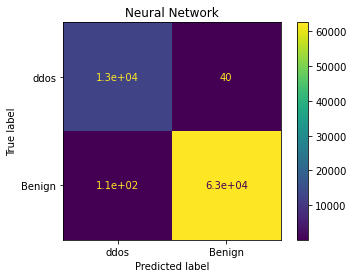

In [19]:
fig_grid = plot_confusion_matrix(clf1, test, test_lbl, labels=['ddos', 'Benign'])
fig_grid.ax_.set_title('Neural Network')
fig_grid.figure_.savefig('drive/MyDrive/work/confusion_matrix_nn_1.png')

In [ ]:
fig_random = plot_confusion_matrix(clf2, test, test_lbl, labels=['ddos', 'Benign'])
fig_random.ax_.set_title('Neural Network')
fig_random.figure_.savefig('img/confusion_matrix_nn_2.png')

## Save Modell

In [12]:
dump(clf1, 'drive/MyDrive/work/neural_network_1.model')

['drive/MyDrive/work/neural_network_1.model']

In [ ]:
dump(clf2, 'models/neural_network_2.model')